In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df_police = pd.read_csv('./Datasets/police.csv')
df_population = pd.read_csv('./Datasets/population.csv')
df_race = pd.read_csv('./Datasets/race.csv')
population_2020 = 331449281

In [8]:
# df_police

In [ ]:
# df_population

In [ ]:
# df_race

In [ ]:
# plt.figure(figsize=(16, 4))

# age_plot = sns.histplot(data=df_police, x='age', binwidth=4)

# age_plot.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# age_plot.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
# age_plot.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# age_plot.set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])

# age_plot.set_xlabel('Age')
# age_plot.set_title('Age Range')

# #plt.savefig('./age_plot.jpg')
# plt.show()

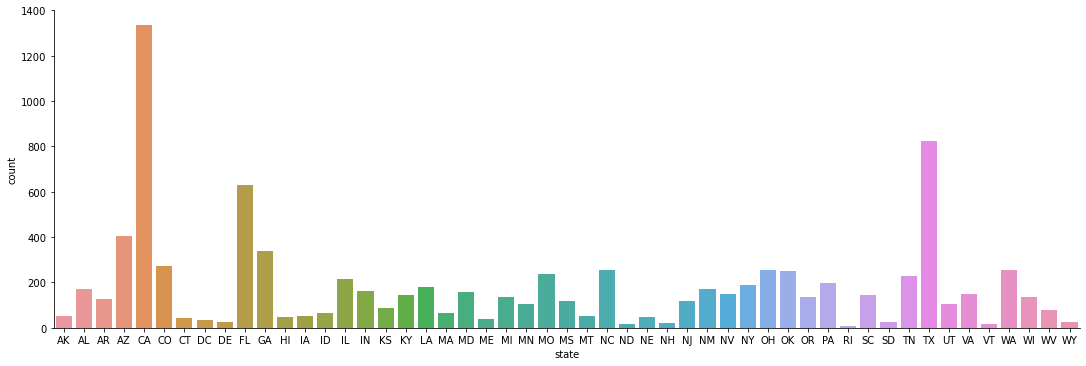

In [3]:
# This is shootings in each state without the ratio.

sns.catplot(data=df_police.sort_values(by='state'), x='state', kind='count',height=5, aspect=3)
plt.show()

In [ ]:
# This is shootings in each state with the ratio.

population_dict = {}
for city, num in zip(df_population['abbreviation'], df_population['population'] / 10000):
    population_dict[city] = num

# population_dict

percentage_dict = {'state': [], 'percentage': [], 'state_name': []}
for city in population_dict:
    percentage = df_police['state'].value_counts()[city] / population_dict[city] * 100
    percentage = round(percentage)
    percentage_dict['state'].append(city)
    percentage_dict['percentage'].append(percentage)
    


    
for state in df_population['state']:
    percentage_dict['state_name'].append(state)


df_percentage = pd.DataFrame.from_dict(percentage_dict)
percentage_dict

plt.figure(figsize=(16, 4))

percentage_plot = sns.barplot(data=df_percentage, x='state', y='percentage')
percentage_plot.set_title('Shootings per 10,000 population')
percentage_plot.set_xlabel('State')
percentage_plot.set_ylabel('Number of Shootings')

#plt.savefig('./Shootings_per_10000.jpg')
plt.show()

In [ ]:
df_race_percentage_local = round((df_police['race'].value_counts().sort_values() / 9096) * 100, 2)
df_race_percentage_local = df_race_percentage_local.reset_index()
df_race_percentage_local.rename(columns={'index': 'race', 'race': 'percentage'}, inplace=True)
df_race_percentage_local

In [ ]:
df_race_percentage_global = {'race': [], 'percentage': []}

for race, num_of_shooting in df_police['race'].value_counts().sort_values().iteritems():
    percentage_global = (num_of_shooting / (df_race.loc[df_race['race'] == race, 'population'].item())) * 100
    df_race_percentage_global['race'].append(race)
    df_race_percentage_global['percentage'].append(percentage_global)

df_race_percentage_global = pd.DataFrame.from_dict(df_race_percentage_global)
df_race_percentage_global

In [ ]:
df_police['armed_or_unarmed'].value_counts()
unarmed_mask = df_police['armed_or_unarmed'] == 'Unarmed/Did Not Have Actual Weapon'

df_police[unarmed_mask]['state'].value_counts()

In [12]:
df_state = df_police['state'].value_counts().reset_index()
df_state.rename(columns={'index': 'state', 'state': 'num_of_shootings'}, inplace=True)
df_state

,state,num_of_shootings
0,CA,1336
1,TX,823
2,FL,628
3,AZ,404
4,GA,337
5,CO,274
6,OH,256
7,WA,253
8,NC,253
9,OK,250


In [43]:
df_zip = pd.read_csv('../zipcode.csv', converters={'project_id': lambda x: str(x)})
df_zip

,name,age,gender,race,date_of_incident,city,state,zipcode,responsible_agency,cause_of_death,criminal_charges,mental_illness,alleged_weapon,alleged_threat_level,armed_or_unarmed
0,Douglas Musto,28,Male,Unknown race,4/7/2013,Westfield,MA,1085,Westfield Police Department,Gunshot,No known charges,No,knife,other,Allegedly Armed
1,Peter Doherty,52,Male,White,4/5/2016,West Springfield,MA,1089,West Springfield Police Department,Gunshot,No known charges,Yes,knife,other,Allegedly Armed
2,Wayne Edwards,23,Male,Black,8/11/2013,Springfield,MA,1103,Massachusetts State Police Department,Gunshot,No known charges,No,undetermined,other,Unclear
3,David J. Kingsbury,34,Male,White,6/26/2014,Springfield,MA,1108,Springfield Police Department,Gunshot,No known charges,Unclear,knife,other,Allegedly Armed
4,Louis M. Squires,44,Male,Black,5/15/2013,Springfield,MA,1109,Springfield Police Department,Gunshot,No known charges,No,gun,other,Allegedly Armed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,Garrett James Ebenal,28,Male,White,2/12/2019,Fairbanks,AK,99712,Fairbanks Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
9092,Vincent Nageak III,36,Male,Native American,2/10/2016,Barrow,AK,99723,North Slope Borough Police Department,Gunshot,No known charges,Unclear,gun,attack,Allegedly Armed
9093,Daniel Duane Jensen Jr.,59,Male,White,1/7/2020,Delta Junction,AK,99737,"Alaska Department of Public Safety, North Pole...",Gunshot,No known charges,No,gun,attack,Allegedly Armed
9094,Douglas Brown,26,Male,Unknown race,8/19/2021,Selawik,AK,99770,Alaska State Troopers,Gunshot,No known charges,No,gun,other,Allegedly Armed
